In [7]:
import pandas as pd
import os

import numpy as np
import matplotlib.pyplot as plt

from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [8]:
# load data
directory = '../data'
file_name = 'boston_housing.csv'
df = pd.read_csv(os.path.join(directory,file_name))

In [9]:
## Outliers handling with Winsorization method.
## This method uses winsorization to handle outliers 
## where the lowest 5% and highest 5% of values are replaced by value at corresponding percentiles (5th and 95th).
def my_outlier_winsorization(df):
    # select numeric columns
    numeric_columns = df.select_dtypes(include=np.number).columns
    for col in numeric_columns:
        df[col] = winsorize(df[col], limits=[0.05, 0.05],inclusive=(True, True), inplace=True)
    return df
df = my_outlier_winsorization(df)

In [10]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.02763,18.0,2.31,0,0.538,6.575,65.2,4.0900,2,296,15.3,396.90,4.98,24.0
1,0.02763,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02763,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,3.70,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [11]:
## Split dataset into Features (X) and target (y)
X = df.drop(columns='medv')
y = df['medv']
## split data into tran-test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2, random_state=42)

In [23]:
## perform Normalize/standardize using StandardScaler()
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# Transform train and test set
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the result (NumPy array) back to a DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [25]:
X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666,20.2,349.48,24.91
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307,21.0,395.62,8.47
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,2,304,16.9,362.25,7.83
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666,20.2,83.45,23.29
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28


# Feature selection
Feature selection is selecting some important features among available features in the dataset. **Random Forests** can be used for feature selection. <br><br>
**Random Forests** is a kind of Bagging Algorithm that aggregates a specified number of decision trees. The tree-based strategies used by random forests naturally rank by how well they improve the purity of the node, or in other words, a decrease in the impurity (Gini impurity) over all trees. Nodes with the greatest decrease in impurity happen at the start of the trees, while notes with the least decrease in impurity occur at the end of the trees. Thus, by pruning trees below a particular node, we can create a subset of the most important features.

In [13]:
def feature_selection_rfr(X_train, y_train, n_features=5):
#     X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
    rfr = RandomForestRegressor(random_state=42)
    rfr.fit(X_train, y_train)
#     y_pred = rfr.predict(X_test)
    rfr_importances = pd.Series(rfr.feature_importances_, index=X_train.columns).sort_values(ascending=False)
    rfr_importances.plot(kind='bar', title="Feature Ranking:")
    plt.show()     
    print(f'Top {n_features} important features are:')
    print(rfr_importances.head(5))
    return rfr_importances.head(5)

In [22]:
X_train_scaled.shape[1]

13

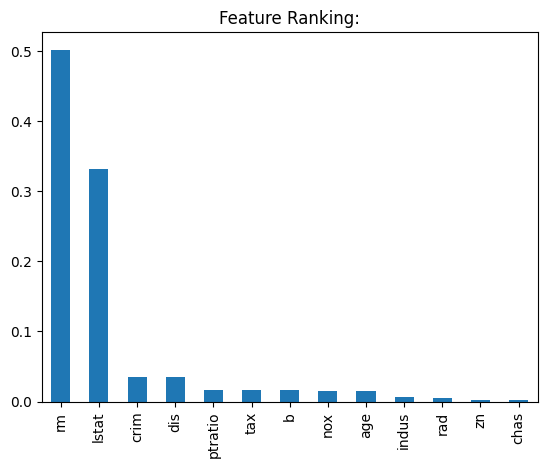

Top 5 important features are:
rm         0.501672
lstat      0.331945
crim       0.035763
dis        0.035260
ptratio    0.016842
dtype: float64


In [26]:
imp_features=feature_selection_rfr(X_train_scaled_df, y_train)

In [27]:
imp_features.index

Index(['rm', 'lstat', 'crim', 'dis', 'ptratio'], dtype='object')

In [30]:
X_train_scaled_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,2.643802,-0.507898,1.080216,-0.278089,0.594602,-1.704750,1.040705,-0.836197,1.709704,1.593002,0.877941,-0.115724,1.915925
1,-0.460119,-0.507898,-0.417347,-0.278089,-0.129455,-0.807401,-0.453312,0.371573,-0.632118,-0.597993,1.262739,0.447362,-0.582846
2,-0.587917,1.063928,-0.730091,-0.278089,-1.083114,-0.473858,-1.669031,1.450502,-0.866300,-0.616302,-0.709353,0.040119,-0.680121
3,0.924750,-0.507898,1.080216,-0.278089,0.594602,-0.351954,0.593965,-0.875937,1.709704,1.593002,0.877941,-3.362320,1.669696
4,-0.438900,-0.507898,-0.417347,-0.278089,-0.129455,-0.988564,0.022723,0.017940,-0.632118,-0.597993,1.262739,0.390370,-0.155744


In [31]:
# Select only top-5 important features.
X_train_selected = X_train_scaled_df[imp_features.index]
X_test_selected = X_test_scaled_df[imp_features.index]

In [32]:
X_train_selected.head()

,rm,lstat,crim,dis,ptratio
0,-1.704750,1.915925,2.643802,-0.836197,0.877941
1,-0.807401,-0.582846,-0.460119,0.371573,1.262739
2,-0.473858,-0.680121,-0.587917,1.450502,-0.709353
3,-0.351954,1.669696,0.924750,-0.875937,0.877941
4,-0.988564,-0.155744,-0.438900,0.017940,1.262739


# Train the Linear Regression model

In [36]:
## initilize the linear regression model
lr_model = LinearRegression()

## fit the model
lr_model.fit(X_train_selected, y_train)

LinearRegression()

In [37]:
## Parameters of Linear regression
lr_model.coef_

array([ 3.27313816, -4.04083254, -0.90690327, -1.3387826 , -1.51399813])